In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

path = './Dataset/'
address_csv = 'passingevents.csv'
df = pd.read_csv(path + address_csv)

matchid = 38

df_matchid = df[df['MatchID'] == matchid]
df_team = df_matchid[df_matchid['TeamID'] == 'Huskies']

player_huskies_matchid = df_team["OriginPlayerID"].unique()
player_huskies_matchid = player_huskies_matchid.tolist()
player_huskies_matchid.sort()
# print(player_huskies_matchid)

pairs_distinct_matchid = []
for i in range(len(player_huskies_matchid) - 1):
    for j in range(i + 1, len(player_huskies_matchid)):
        pairs_distinct_matchid.append([player_huskies_matchid[i], player_huskies_matchid[j]])

ori_player_matchid = df_matchid.iloc[:, 2].tolist()
des_player_matchid = df_matchid.iloc[:, 3].tolist()

pairs_matchid = []
for i in range(len(ori_player_matchid)):
    if (ori_player_matchid[i] <= des_player_matchid[i]):
        pairs_matchid.append([ori_player_matchid[i], des_player_matchid[i]])
    if (ori_player_matchid[i] > des_player_matchid[i]):
        pairs_matchid.append([des_player_matchid[i], ori_player_matchid[i]])


In [2]:
player_des_huskies = df[df["TeamID"] == 'Huskies'].iloc[:, 3]  # des为HusKies接球队员
player_ori_huskies = df[df["TeamID"] == 'Huskies'].iloc[:, 2]  # ori为Huskies出球队员
player_ori_huskies = list(player_ori_huskies.unique())
player_des_huskies = list(player_des_huskies.unique())
player_ori_huskies.sort()
player_des_huskies.sort()
dis_ori_x = list(df["EventOrigin_x"])
dis_ori_y = list(df["EventOrigin_y"])
dis_des_x = list(df["EventDestination_x"])
dis_des_y = list(df["EventDestination_y"])
distance = []
for i in range(len(dis_des_y)):
    distance.append(((dis_ori_x[i] - dis_des_x[i]) ** 2 + (dis_des_y[i] - dis_ori_y[i]) ** 2) ** 0.5)
    distance[i] = int(distance[i] / 3)
# print(distance[0:5])

player_huskies = player_ori_huskies  # 出球与接球队员相同，归结为参与的队员
weight = [0.780373832, 0.81795196, 0.812659847, 0.832448093, 0.842606707, 0.841178878, 0.83362069,
          0.849388753, 0.835820896, 0.836218375, 0.842622951, 0.84305835, 0.812176166, 0.829679595,
          0.806215722, 0.705202312, 0.773413897, 0.746212121, 0.79342723, 0.720430108, 0.645833333,
          0.714285714, 0.721518987, 0.639344262, 0.818181818, 0.846153846, 0.9375, 0.875, 0.8, 0.8, 0.8,
          0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]

<Figure size 2400x1600 with 0 Axes>

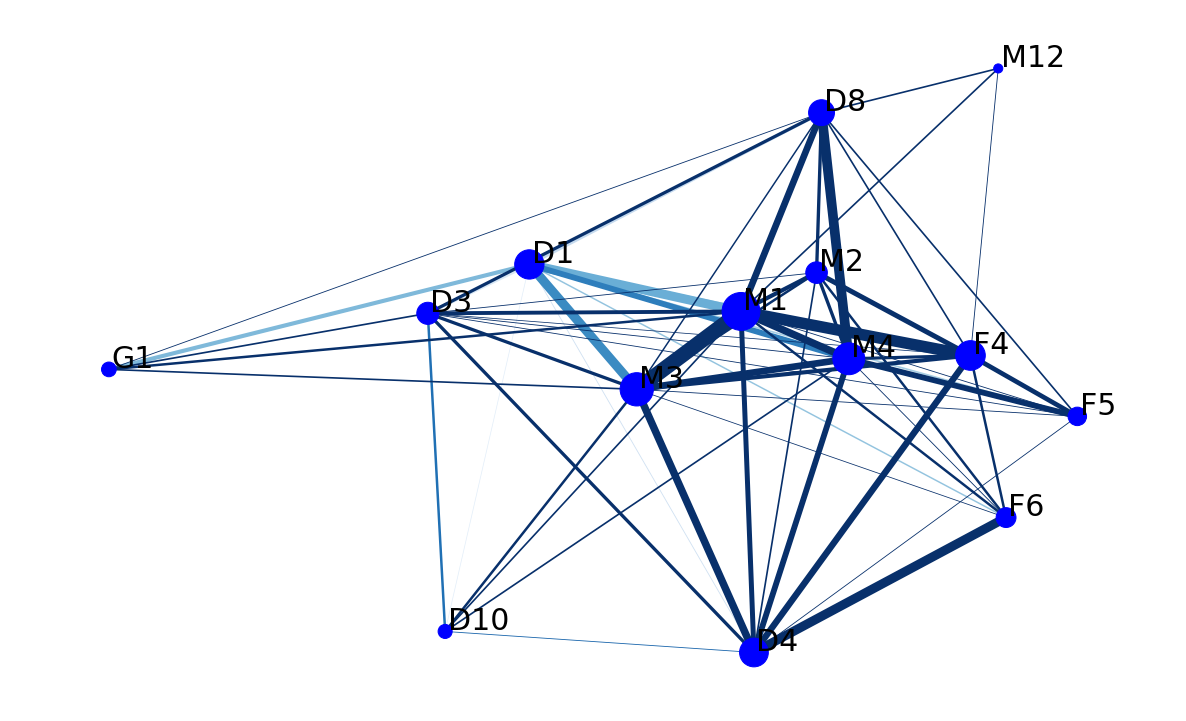

In [4]:
# print(pairs_distinct[1])
count_link_matchid = []
pairs_each_matchid = []
k = 0
for i in range(len(pairs_distinct_matchid)):
    count_link_matchid.append(0)
# print(len(pairs_distinct))
for i in range(len(pairs_matchid)):
    pairs_each_matchid.append(pairs_matchid[i])
for i in pairs_distinct_matchid:
    for j in range(len(pairs_each_matchid)):
        if pairs_each_matchid[j] == i:
            count_link_matchid[k] = count_link_matchid[k] + weight[distance[j]]
    k = k + 1

# print(df)
pairs_distinct_matchid_1 = []
for i in range(len(player_huskies_matchid) - 1):
    for j in range(i + 1, len(player_huskies_matchid)):
        pairs_distinct_matchid_1.append([player_huskies_matchid[i], player_huskies_matchid[j]])
for k in range(len(pairs_distinct_matchid_1)):
    pairs_distinct_matchid_1[k].append(count_link_matchid[k])

# 求每一个球员传球位置均值
player_ori_arr = []
player_des_arr = []
player_x = []
player_y = []
pos_player_mean_matchid = {}
for i in player_huskies_matchid:
    _df1 = df_matchid[df_matchid['OriginPlayerID'] == i]
    _df2 = df_matchid[df_matchid['DestinationPlayerID'] == i]
    player_ori_arr.append(_df1)
    player_des_arr.append(_df2)

    _x1 = list(_df1['EventOrigin_x'])
    _x2 = list(_df2['EventDestination_x'])
    _x = _x1 + _x2
    _mean_x = np.sum(_x) / np.size(_x)

    _y1 = list(_df1['EventOrigin_y'])
    _y2 = list(_df2['EventDestination_y'])
    _y = _y1 + _y2
    _mean_y = np.sum(_y) / np.size(_y) / 105 * 65

    player_x.append(_mean_x)
    player_y.append(_mean_y)
    _l = [_mean_x, _mean_y]
    pos_player_mean_matchid[i] = _l

# 绘图
plt.figure(dpi=400)
plt.figure(figsize=[21, 13])
EG = nx.Graph()
EG.add_nodes_from(player_huskies_matchid)  #添加点a
EG.add_weighted_edges_from(pairs_distinct_matchid_1)
# node_sizes = list(PointSize["count"]) # 点的数量

M = EG.number_of_edges()  # 边的数量
# pos = nx.random_layout(G)

edge_colors = range(2, M + 2)
width_sort = []
for (r, c, v) in EG.edges(data=True):
    width_sort.append(v['weight'])

edge = 0
for (r, c, v) in EG.edges(data=True):
    edge = edge + 1

node_sort = []
for i in range(len(player_huskies_matchid)):
    node_sort.append(0)
for i in range(len(player_huskies_matchid)):
    for (r, c, v) in EG.edges(data=True):
        if (player_huskies_matchid[i] == str(r) or player_huskies_matchid[i] == str(c)):
            node_sort[i] = node_sort[i] + (v['weight'])
for i in range(len(node_sort)):
    node_sort[i] = node_sort[i] * 20
node_sizes = node_sort

nodes = nx.draw_networkx_nodes(EG, pos_player_mean_matchid, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(EG, pos_player_mean_matchid, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues,
                               edge_vmin=0, edge_vmax=20, width=width_sort)

for i in range(len(player_huskies_matchid)):
    _player = player_huskies_matchid[i]
    _x, _y = pos_player_mean_matchid[_player]

    plt.text(_x + 0.15, _y + 0.14, _player[8:], size=30, alpha=1)

ax = plt.gca()
ax.set_axis_off()  # 取消图的边框
plt.savefig('./Plots/' + 'test_matchid' + str(matchid) + '.png')
plt.show()